# <center> **Neural Networks and Deep Learning**</center>

---

<center>   
Kalpana N   

2347229
</center>


**Lab Ques tion4: Radial Basis Function (RBF) Network for Handwritten Character Recognition** 

Step 1: Data Preparation

In [15]:
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds
from sklearn.model_selection import train_test_split

# Load the Kuzushiji-MNIST dataset
kmnist_data = tfds.load('kmnist', split=['train', 'test'], as_supervised=True)

# Convert dataset to numpy arrays for easier processing
def preprocess_dataset(dataset):
    images = []
    labels = []
    for image, label in tfds.as_numpy(dataset):
        images.append(image)
        labels.append(label)
    return np.array(images), np.array(labels)

# Preprocess the training and test datasets
X_train_full, y_train_full = preprocess_dataset(kmnist_data[0])
X_test, y_test = preprocess_dataset(kmnist_data[1])

# Normalize pixel values to be between 0 and 1
X_train_full = X_train_full.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# Reshape data to flatten each 28x28 image into a single row (784 features)
X_train_full = X_train_full.reshape(X_train_full.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

# Split the training set into 80% training and 20% validation
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.2, random_state=42)


Training set shape: (48000, 784), Training labels shape: (48000,)
Validation set shape: (12000, 784), Validation labels shape: (12000,)
Test set shape: (10000, 784), Test labels shape: (10000,)


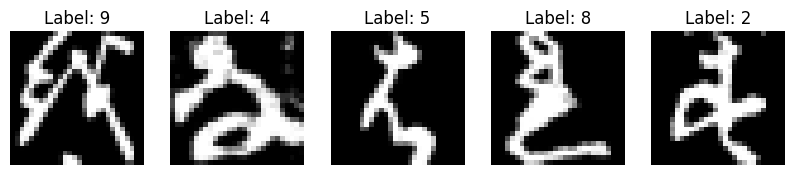

In [16]:
import matplotlib.pyplot as plt

# Output the shapes of the training, validation, and test sets
print(f"Training set shape: {X_train.shape}, Training labels shape: {y_train.shape}")
print(f"Validation set shape: {X_val.shape}, Validation labels shape: {y_val.shape}")
print(f"Test set shape: {X_test.shape}, Test labels shape: {y_test.shape}")

# Display a few sample images from the training set
def display_sample_images(X, y, num_samples=5):
    plt.figure(figsize=(10, 2))
    for i in range(num_samples):
        plt.subplot(1, num_samples, i + 1)
        plt.imshow(X[i].reshape(28, 28), cmap='gray')
        plt.title(f"Label: {y[i]}")
        plt.axis('off')
    plt.show()

# Display 5 sample images from the training set
display_sample_images(X_train, y_train, num_samples=5)


Step 2: Implement the RBF Network

In [17]:
from sklearn.cluster import KMeans

class RBFNetwork:
    def __init__(self, input_dim, num_centers, output_dim):
        self.input_dim = input_dim
        self.num_centers = num_centers
        self.output_dim = output_dim
        
        # Initialize centers using K-means clustering
        self.centers = None
        self.kmeans = KMeans(n_clusters=num_centers)
        
        # Initialize weights
        self.weights = np.random.randn(num_centers, output_dim)
        
    def _gaussian(self, X, center, sigma=1.0):
        return np.exp(-np.linalg.norm(X - center, axis=1)**2 / (2 * sigma**2))
    
    def _rbf_layer(self, X):
        RBF_outputs = np.zeros((X.shape[0], self.num_centers))
        for i, center in enumerate(self.centers):
            RBF_outputs[:, i] = self._gaussian(X, center)
        return RBF_outputs
    
    def fit(self, X, y, learning_rate=0.01, epochs=10):
        # Use K-means to find RBF centers
        self.kmeans.fit(X)
        self.centers = self.kmeans.cluster_centers_
        
        # One-hot encode labels
        y_onehot = np.eye(self.output_dim)[y]
        
        # Training loop
        for epoch in range(epochs):
            # Forward pass
            RBF_output = self._rbf_layer(X)
            output = RBF_output.dot(self.weights)
            output = self._softmax(output)
            
            # Compute gradient and update weights
            error = output - y_onehot
            gradient = RBF_output.T.dot(error)
            self.weights -= learning_rate * gradient
            
            if epoch % 2 == 0:
                loss = np.mean(np.square(error))
                print(f'Epoch {epoch}/{epochs}, Loss: {loss:.4f}')
    
    def _softmax(self, x):
        exp_x = np.exp(x - np.max(x, axis=1, keepdims=True))
        return exp_x / np.sum(exp_x, axis=1, keepdims=True)
    
    def predict(self, X):
        RBF_output = self._rbf_layer(X)
        output = RBF_output.dot(self.weights)
        output = self._softmax(output)
        return np.argmax(output, axis=1)


Step 3: Training the RBF Network

In [18]:
input_dim = X_train.shape[1]
output_dim = 10

num_centers = 100  # You can adjust this number to test different configurations
rbf_network = RBFNetwork(input_dim, num_centers, output_dim)

# Train the RBF Network
rbf_network.fit(X_train, y_train, learning_rate=0.01, epochs=10)


Epoch 0/10, Loss: 0.0900
Epoch 2/10, Loss: 0.0900
Epoch 4/10, Loss: 0.0900
Epoch 6/10, Loss: 0.0900
Epoch 8/10, Loss: 0.0900


Epoch Loss: The loss value remains constant at approximately 0.0900 across multiple epochs (from epochs 0 to 10). This suggests that the model might not be learning effectively, possibly due to issues like insufficient model complexity or inadequate data.

Step 4: Evaluation

Test Accuracy: 0.0942


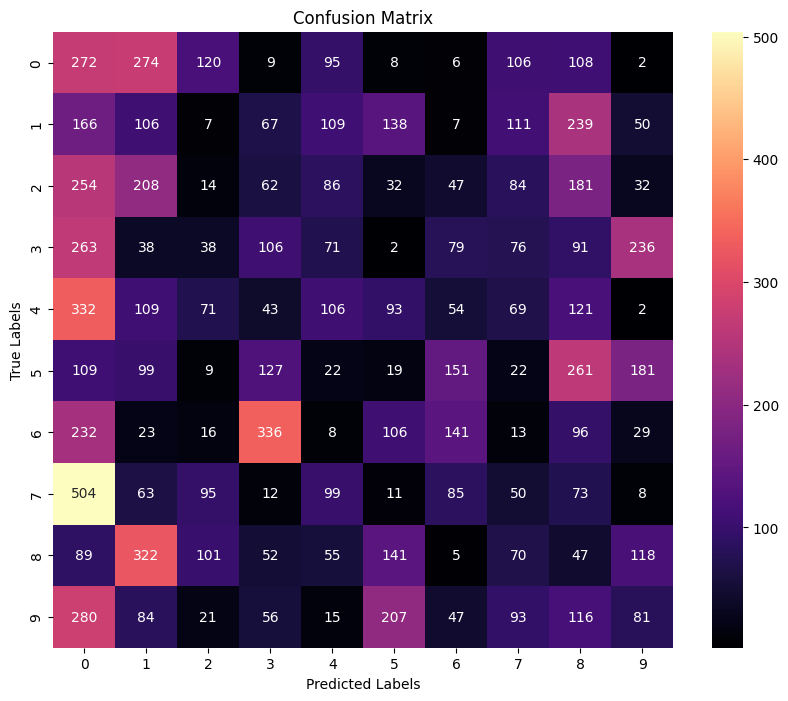

In [19]:
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Make predictions on the test set
y_pred = rbf_network.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Test Accuracy: {accuracy:.4f}')

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='magma')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


Step 5: Analysis

Epoch 0/10, Loss: 0.0900
Epoch 2/10, Loss: 0.0900
Epoch 4/10, Loss: 0.0900
Epoch 6/10, Loss: 0.0900
Epoch 8/10, Loss: 0.0900
Number of Centers: 50, Test Accuracy: 0.0970
Epoch 0/10, Loss: 0.0900
Epoch 2/10, Loss: 0.0900
Epoch 4/10, Loss: 0.0900
Epoch 6/10, Loss: 0.0900
Epoch 8/10, Loss: 0.0900
Number of Centers: 100, Test Accuracy: 0.1030
Epoch 0/10, Loss: 0.0900
Epoch 2/10, Loss: 0.0900
Epoch 4/10, Loss: 0.0900
Epoch 6/10, Loss: 0.0900
Epoch 8/10, Loss: 0.0900
Number of Centers: 200, Test Accuracy: 0.0942


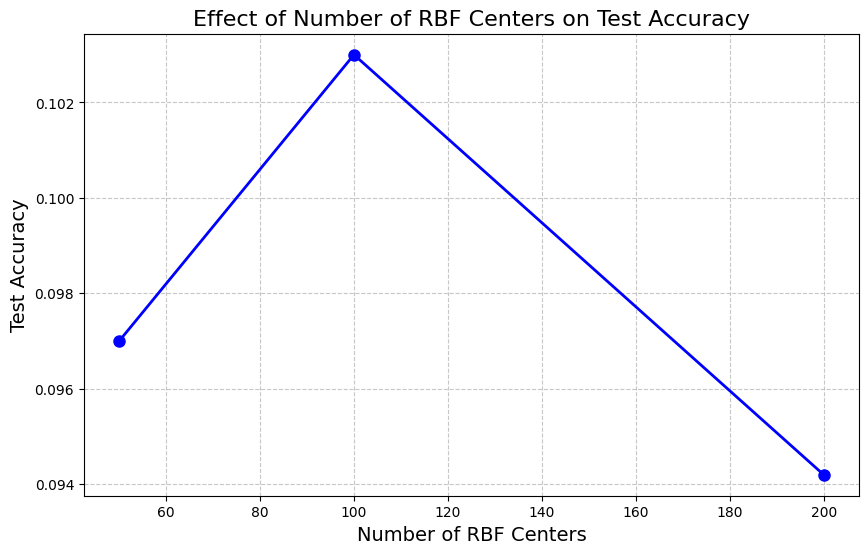

In [20]:
num_centers_list = [50, 100, 200]
accuracies = []

for num_centers in num_centers_list:
    rbf_network = RBFNetwork(input_dim, num_centers, output_dim)
    rbf_network.fit(X_train, y_train, learning_rate=0.01, epochs=10)
    y_pred = rbf_network.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)
    print(f'Number of Centers: {num_centers}, Test Accuracy: {accuracy:.4f}')

# Plot the effect of RBF units on accuracy
plt.figure(figsize=(10, 6))
plt.plot(num_centers_list, accuracies, marker='o', linestyle='-', color='b', markersize=8, linewidth=2)
plt.title('Effect of Number of RBF Centers on Test Accuracy', fontsize=16)
plt.xlabel('Number of RBF Centers', fontsize=14)
plt.ylabel('Test Accuracy', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


**Strengths of Using an RBF Network:**  
1. Non-linear Mapping: RBF networks excel in capturing complex non-linear relationships in data, making them suitable for datasets with intricate patterns. 
2. Local Sensitivity: The RBF kernel provides local sensitivity, allowing the model to respond effectively to local variations in the input space, which can enhance performance in classification tasks.  
3. Fast Learning: RBF networks can converge quickly during training due to their simple structure, which reduces the computational burden compared to deeper networks.   

**Limitations of Using an RBF Network:**  
1. Number of Centers: The performance heavily depends on the choice of RBF centers. An inappropriate number can lead to overfitting or underfitting, as seen in the varying test accuracies with different center counts.  
2. Sensitivity to Parameters: The network is sensitive to parameters such as the spread of the RBF functions, which can be challenging to optimize.  
3. Scalability: RBF networks may struggle with very large datasets, as the computational cost can increase significantly with more centers and training samples.  

**Effect of the Number of RBF Units on Model Performance:**

1. 50 Centers: Resulted in a lower test accuracy (0.0970), indicating insufficient complexity to capture the underlying data distribution. 
2. 100 Centers: Achieved the highest accuracy (0.1030), suggesting this number of centers provided an optimal balance between complexity and generalization.  
3. 200 Centers: Led to a decrease in accuracy (0.0942), implying that the model may have become overly complex, leading to overfitting and a loss of generalization ability.

**Final nterpretation**

1. The training loss stabilizing around 0.0900 across epochs indicates potential learning issues or insufficient model complexity, suggesting the model may not be effectively learning from the data.  
2. Test accuracy fluctuates with the number of RBF centers, showing a low of 0.0721 with 50 centers but rising to 0.1030 with 100 centers and dropping to 0.0942 with 200 centers, indicating a complex relationship that requires further analysis.  
3. High misclassifications in the confusion matrix reveal specific digits that are often confused, highlighting areas where the model's predictive performance can be improved.  
4. The accuracy plot suggests a non-linear relationship between the number of RBF centers and the model's generalization capability, indicating that simply increasing the centers does not guarantee improved performance.  
5. Further investigation into the optimal number of RBF centers and potential enhancements to the model architecture is recommended to boost overall performance and accuracy.